https://machineboxio.com/docs/facebox/teaching-facebox -> followed this and posted the Lennon image which is wqhy it is recognised below

https://www.home-assistant.io/components/image_processing/

In [1]:
import requests
import operator
import os
import io
import base64
import pathlib
from PIL import Image
import json
from pprint import PrettyPrinter
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
import sys
print(sys.version)

#HEADERS = {'content-type': 'application/json'} ; # charset=utf-8
IP = "localhost"
PORT = "8080"
URL = "http://{}:{}/facebox/check".format(IP, PORT)
print(URL)
IMG_FILE = "thebeatles.jpg"
FIG_SIZE = (12, 8)

def print_json(json_data):
    PrettyPrinter().pprint(json_data)
    
def encode_image(image):
        """base64 encode an image stream."""
        base64_img = base64.b64encode(image).decode('ascii')
        return {"base64": base64_img}

3.6.3 |Anaconda custom (64-bit)| (default, Nov  3 2017, 12:34:11) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
http://localhost:8080/facebox/check


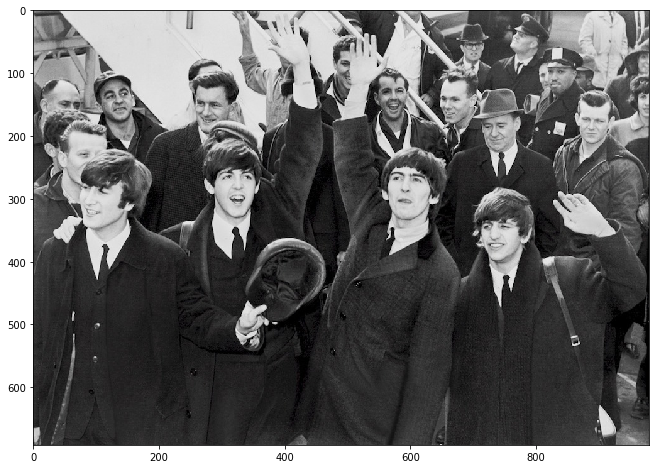

In [2]:
img = plt.imread(IMG_FILE)
fig, ax = plt.subplots(figsize=FIG_SIZE)
ax.imshow(img);

In [3]:
%%time
IMG_FILE = "/Users/robincole/.homeassistant/images/thebeatles.jpg"
file = {
    'file': (IMG_FILE, open(IMG_FILE, 'rb')),
}

response = requests.post(URL, files=file).json()

CPU times: user 8.86 ms, sys: 5.9 ms, total: 14.8 ms
Wall time: 4.89 s


In [4]:
print_json(response)

{'faces': [{'confidence': 0,
            'matched': False,
            'rect': {'height': 52, 'left': 636, 'top': 124, 'width': 52}},
           {'confidence': 0,
            'matched': False,
            'rect': {'height': 62, 'left': 246, 'top': 129, 'width': 62}},
           {'confidence': 0,
            'matched': False,
            'rect': {'height': 52, 'left': 711, 'top': 164, 'width': 52}},
           {'confidence': 0,
            'matched': False,
            'rect': {'height': 52, 'left': 106, 'top': 118, 'width': 52}},
           {'confidence': 0,
            'matched': False,
            'rect': {'height': 43, 'left': 549, 'top': 118, 'width': 43}},
           {'confidence': 0,
            'matched': False,
            'rect': {'height': 43, 'left': 866, 'top': 166, 'width': 43}},
           {'confidence': 0.7452715442560935,
            'id': '1',
            'matched': True,
            'name': 'George_Harrison',
            'rect': {'height': 62, 'left': 563, 'top': 253,

In [5]:
response['facesCount']

12

## JSON encode image to send
What we do in HA

In [6]:
image = Image.open(IMG_FILE, mode='r') # Create a JpegImageFile object

In [7]:
with io.BytesIO() as output:
    with Image.open(IMG_FILE) as img:
        img.save(output, 'BMP')
    data = output.getvalue()

In [8]:
# data is a bytes object

In [9]:
response = requests.post(URL, json=encode_image(data), timeout=9).json()

In [10]:
print_json(response['success'])

True


## Matches

In [11]:
def get_matched_faces(response):
    """Return the name and confidence of matched faces."""
    return {face['name']: round(face['confidence'], 3) 
            for face in response['faces'] 
            if face['matched']}

In [12]:
get_matched_faces(response)

{'George_Harrison': 0.551, 'John_Lennon': 0.581}

# Bounding boxes

In [13]:
def get_bounding_boxes(response):
    """Return the bounding boxes of faces."""
    bounding_boxes = []
    for face in response['faces']:
        bounding_boxes.append(face['rect'])
    return bounding_boxes

In [14]:
bounding_boxes = get_bounding_boxes(response)
bounding_boxes

[{'height': 52, 'left': 636, 'top': 124, 'width': 52},
 {'height': 62, 'left': 246, 'top': 129, 'width': 62},
 {'height': 52, 'left': 711, 'top': 164, 'width': 52},
 {'height': 52, 'left': 106, 'top': 118, 'width': 52},
 {'height': 43, 'left': 549, 'top': 118, 'width': 43},
 {'height': 43, 'left': 866, 'top': 166, 'width': 43},
 {'height': 62, 'left': 563, 'top': 253, 'width': 63},
 {'height': 74, 'left': 287, 'top': 246, 'width': 74},
 {'height': 75, 'left': 55, 'top': 204, 'width': 74},
 {'height': 75, 'left': 63, 'top': 262, 'width': 74},
 {'height': 62, 'left': 709, 'top': 322, 'width': 62},
 {'height': 52, 'left': 803, 'top': 78, 'width': 52}]

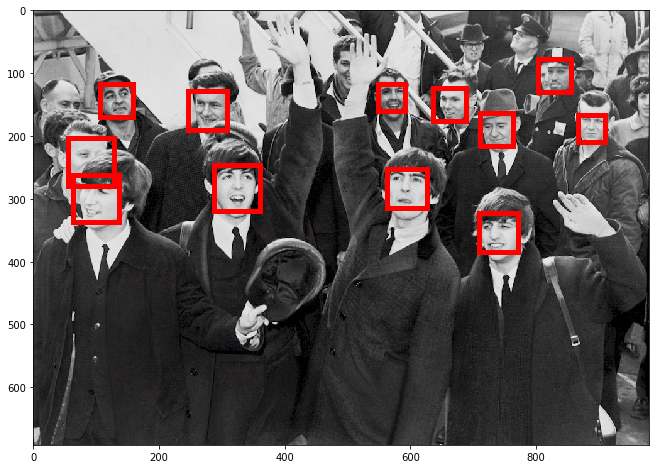

In [15]:
img = plt.imread(IMG_FILE)
fig, ax = plt.subplots(figsize=FIG_SIZE)
ax.imshow(img);

for box in bounding_boxes:
    x = box['left']
    y = box['top']
    width = box['width']
    height = box['height']

    rect = patches.Rectangle((x,y), width, height, linewidth=5, edgecolor='r', facecolor='none')
    ax.add_patch(rect);

plt.savefig('facebox.png')

In [16]:
def save_boxes_image(img_file, bounding_boxes):
    """Take an image file and dict of bounding boxes and save the boxes on a copy of the image."""
    img = plt.imread(img_file)
    fig, ax = plt.subplots()
    ax.imshow(img);
    for box in bounding_boxes:
        x = box['left']
        y = box['top']
        width = box['width']
        height = box['height']

        rect = patches.Rectangle((x,y), width, height, linewidth=5, edgecolor='r', facecolor='none')
        ax.add_patch(rect);

    plt.savefig("boxed_image.png")

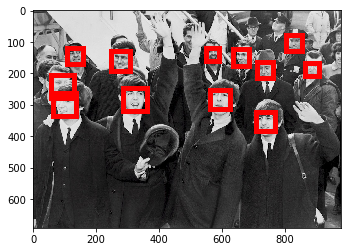

In [17]:
save_boxes_image(IMG_FILE, bounding_boxes)

## Teaching
https://machineboxio.com/docs/facebox/teaching-facebox

Can teach using cURL:
```
curl -H 'Content-Type: application/json' -d '{"url":"https://machinebox.io/samples/faces/john.jpg","name":"John Lennon","id":"john.jpg"}' http://localhost:8080/facebox/teach
```

Have a library for teaching with a python script:
    
    https://github.com/robmarkcole/facebox_python